In [1]:
# here we used Stacked LSTM for our project
# keras and tensorflow > 2.0

In [2]:
#### Data collection directly
import yfinance as yf

In [3]:
df = yf.download('MSFT', start='2020-01-01', end='2025-01-01')
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2020-01-02  153.630676  153.735890  151.440331  151.870747  22622100
2020-01-03  151.717697  152.989824  151.182068  151.430763  21116200
2020-01-06  152.109833  152.176794  149.699486  150.244690  20813700
2020-01-07  150.723007  152.722059  150.474326  152.387297  21634100
2020-01-08  153.123749  153.802860  151.076871  152.014222  27746500


In [4]:
df.to_csv('MSFT.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('MSFT.csv')

In [7]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,153.63067626953125,153.73589024457866,151.44033118239196,151.8707466822009,22622100
3,2020-01-03,151.7176971435547,152.98982437351236,151.18206769826887,151.43076322272856,21116200
4,2020-01-06,152.10983276367188,152.17679372991023,149.6994860907794,150.24468963367391,20813700


In [8]:
# we are working on Close data 
df1=df[2:].reset_index()['Close']
df1.head()

0    153.63067626953125
1     151.7176971435547
2    152.10983276367188
3    150.72300720214844
4    153.12374877929688
Name: Close, dtype: object

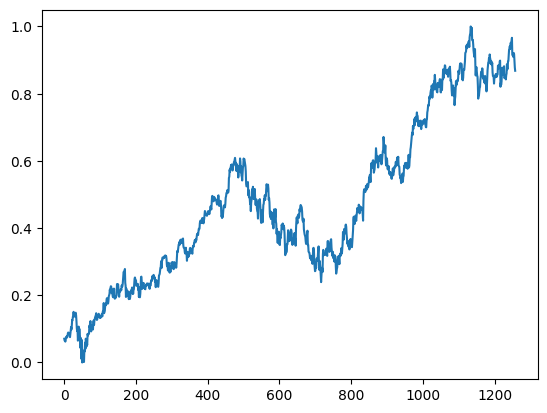

In [23]:
# ploting data 
import matplotlib.pyplot as plt
plt.plot(df1)


In [10]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.0707033 ]
 [0.0650083 ]
 [0.0661757 ]
 ...
 [0.89504056]
 [0.87807146]
 [0.868158  ]]


In [14]:
# splitting dataset for train and test
# we are doing such split because data is time dependent
# so next data depends on previous one
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]
print(test_data)


[[0.45987487]
 [0.45673312]
 [0.45658631]
 [0.44824721]
 [0.46956475]
 [0.46307557]
 [0.44381328]
 [0.44575133]
 [0.46439683]
 [0.4535326 ]
 [0.46134303]
 [0.46008046]
 [0.46031522]
 [0.45344447]
 [0.45241667]
 [0.44070088]
 [0.42205539]
 [0.48063457]
 [0.50841185]
 [0.51554716]
 [0.5105554 ]
 [0.51011504]
 [0.5071491 ]
 [0.51011504]
 [0.52550114]
 [0.51962849]
 [0.51478364]
 [0.53037534]
 [0.5239156 ]
 [0.52056817]
 [0.52200699]
 [0.52870167]
 [0.53735329]
 [0.55065426]
 [0.55012468]
 [0.55848204]
 [0.54106113]
 [0.53691185]
 [0.57243059]
 [0.59294128]
 [0.58799731]
 [0.57969891]
 [0.59202894]
 [0.60032743]
 [0.60191652]
 [0.59526599]
 [0.56495595]
 [0.57048837]
 [0.5749907 ]
 [0.58988066]
 [0.59706104]
 [0.60603628]
 [0.63770001]
 [0.62072028]
 [0.60812569]
 [0.59491285]
 [0.61301042]
 [0.59920923]
 [0.58031698]
 [0.59788497]
 [0.60165168]
 [0.59929744]
 [0.61545297]
 [0.60794907]
 [0.60841995]
 [0.61760116]
 [0.60568323]
 [0.58982188]
 [0.59170533]
 [0.60562436]
 [0.62169157]
 [0.62

In [15]:
training_size,test_size

(817, 441)

In [16]:
print(train_data)

[[0.0707033 ]
 [0.0650083 ]
 [0.0661757 ]
 [0.06204708]
 [0.06919416]
 [0.07488916]
 [0.07275341]
 [0.07827765]
 [0.07500308]
 [0.07799283]
 [0.08650691]
 [0.0891551 ]
 [0.08744659]
 [0.08516844]
 [0.08807315]
 [0.08328926]
 [0.07543022]
 [0.08448523]
 [0.09183173]
 [0.10532879]
 [0.09806765]
 [0.10988478]
 [0.12622918]
 [0.12560285]
 [0.13622405]
 [0.13696436]
 [0.1506608 ]
 [0.13853041]
 [0.13929934]
 [0.13645186]
 [0.14112173]
 [0.1464749 ]
 [0.14807398]
 [0.13990791]
 [0.1232616 ]
 [0.10127617]
 [0.0932243 ]
 [0.09922042]
 [0.06498568]
 [0.07592141]
 [0.1067012 ]
 [0.08305959]
 [0.10030524]
 [0.08808468]
 [0.07466507]
 [0.0434    ]
 [0.07280911]
 [0.05199434]
 [0.01039307]
 [0.06684169]
 [0.        ]
 [0.03183607]
 [0.01421916]
 [0.02081485]
 [0.0055107 ]
 [0.00159885]
 [0.03688988]
 [0.0328354 ]
 [0.05907542]
 [0.04077311]
 [0.07083903]
 [0.06364376]
 [0.04765436]
 [0.05664831]
 [0.05256535]
 [0.08522962]
 [0.08014724]
 [0.08482983]
 [0.0848584 ]
 [0.08591478]
 [0.10929942]
 [0.10

In [17]:
# converting array of values into matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # Create input features    ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])  # Create target variable
    return np.array(dataX), np.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

D:\anaconda functionalities\anaconda installation\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 298ms/step - loss: 0.0676 - val_loss: 0.0670
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.0062 - val_loss: 0.0121
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - loss: 0.0037 - val_loss: 0.0412
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 0.0022 - val_loss: 0.0241
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 0.0017 - val_loss: 0.0073
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - loss: 0.0013 - val_loss: 0.0060
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.0010 - val_loss: 0.0036
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [31]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

251.81507523578168

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

392.8333571668481

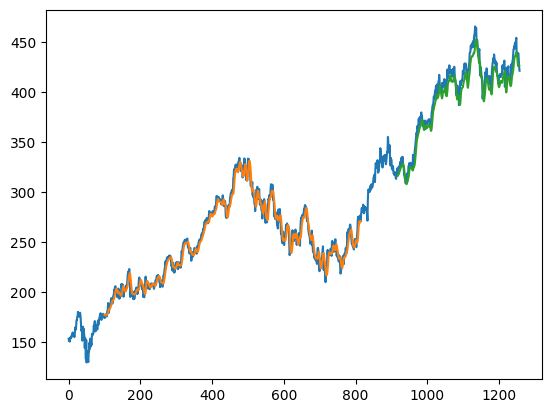

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=100  # time stamp
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

441

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.9065631048026714,
 0.9013340437937041,
 0.8884395514741941,
 0.8971744891124447,
 0.8947976266807851,
 0.8850227095205099,
 0.8917967947062526,
 0.863244737017234,
 0.8526676901111776,
 0.8509147972223907,
 0.8494886070820271,
 0.8301172055195141,
 0.8454776857979927,
 0.8536480709115766,
 0.8488350198817611,
 0.850261119170415,
 0.8586396455511396,
 0.8574511234836,
 0.8496668581366451,
 0.8514495503862447,
 0.8557279391039161,
 0.857569957520012,
 0.8835075755562567,
 0.8748616725936051,
 0.8752479740636541,
 0.8854090109905586,
 0.8807741201636512,
 0.8966991529667967,
 0.8984223373464806,
 0.8206394643019785,
 0.8325831934784826,
 0.8269084139812606,
 0.8358216026741294,
 0.8617294213495614,
 0.8773276605525739,
 0.8687412654598381,
 0.8552822206156612,
 0.870197073257595,
 0.8766443648432047,
 0.8816654662884511,
 0.8463393234136896,
 0.8485973518089371,
 0.8546286334153952,
 0.8477950403597365,
 0.8424662241734142,
 0.8547613677634058,
 0.8600902748014381,
 0.8874788854948206,

In [56]:
# demonstrate prediction for next 50 days
from numpy import array

lst_output=[]
n_steps=100     # time stamp for previous 100 day data
i=0
forecasting_days=50
while(i<forecasting_days):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print(f"{i} day input {x_input}")
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print(f"{i} day output {yhat}")
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.4088476  0.40775403 0.40667367 0.40560597 0.40455106 0.40350866
 0.40247849 0.40146032 0.40045422 0.39945957 0.39847666 0.39750513
 0.39654467 0.39559525 0.39465663 0.3937287  0.39281145 0.39190447
 0.39100775 0.39012104 0.38924426 0.38837725 0.38751996 0.38667205
 0.38583359 0.38500419 0.38418403 0.38337284 0.38257051 0.38177675
 0.38099167 0.38021505 0.37944677 0.37868676 0.37793475 0.37719098
 0.37645492 0.37572667 0.37500617 0.37429315 0.37358779 0.37288955
 0.37219879 0.37151518 0.37083864 0.37016898 0.36950636 0.36885053
 0.3682014  0.36755887 0.36692291 0.36629346 0.36567044 0.3650535
 0.36444297 0.36383855 0.36324018 0.36264777 0.36206129 0.36148065
 0.3609058  0.36033657 0.35977304 0.35921499 0.35866246 0.35811538
 0.3575736  0.35703707 0.35650584 0.35597971 0.35545877 0.35494277
 0.35443181 0.35392568 0.35342431 0.35292807 0.3524363  0.35194936
 0.35146698 0.35098919 0.35051593 0.3500472  0.34958285 0.34912285
 0.3486672  0.34821579 0.34776866 0.34732565 0.3468

In [57]:
day_new=np.arange(1,101)
day_pred=np.arange(101,151)

In [52]:
import matplotlib.pyplot as plt

In [53]:
len(df1)

1258

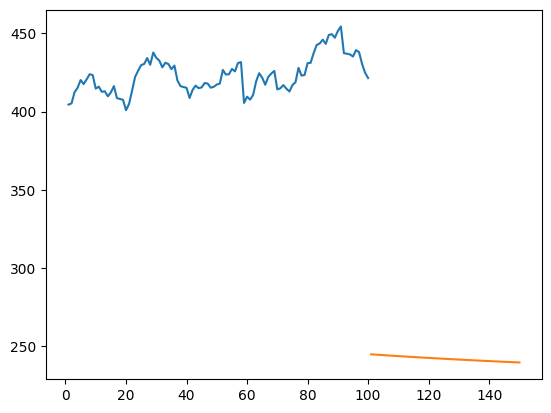

In [58]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

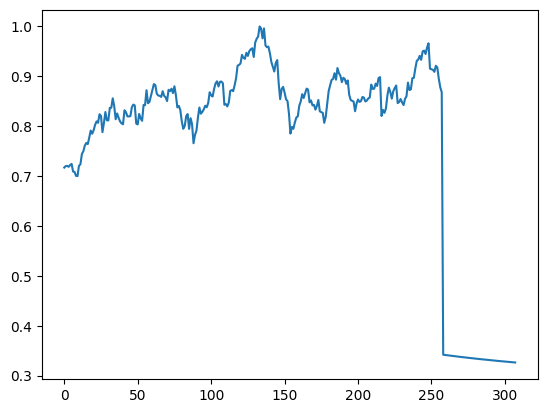

In [62]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

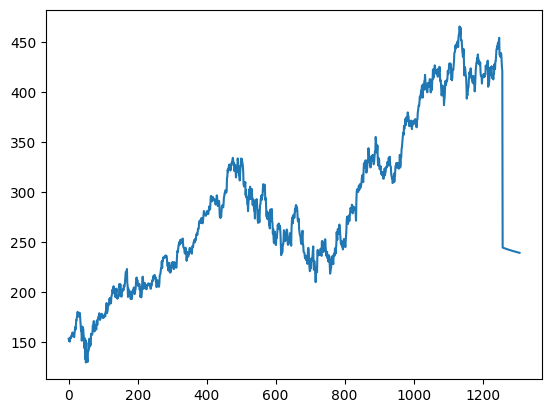

In [63]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)